In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set plot style
sns.set(style="whitegrid", palette="Set2")


# Decision Tree Implementation (Splitting & Pruning)


In [3]:
from sklearn.datasets import make_classification

# Create a synthetic dataset (more realistic, with noise)
X, y = make_classification(
    n_samples=500,        # Total 500 rows of data
    n_features=5,         # Each row has 5 features (X1 ... X5)
    n_informative=3,      # Out of 5 features, 3 are actually useful for prediction
    n_redundant=0,        # No duplicate or derived features
    n_classes=3,          #  There are 3 output classes (our target variable can be 0, 1, or 2)
    random_state=42
)

In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We are training a Decision Tree Classifier that learns to predict the target class (0, 1, or 2) based on the 5 feature values.

So the problem is:

*“Given 5 numeric input features, predict which of the 3 categories this sample belongs to.”*


This mimics a multi-class classification task (like predicting type of flower, customer segment, or risk level).

In [5]:
# Train a Decision Tree WITHOUT pruning (default)

clf_default = DecisionTreeClassifier(random_state=42)
clf_default.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [6]:
# Evaluate accuracy

y_pred_default = clf_default.predict(X_test)
print("Accuracy without pruning:", accuracy_score(y_test, y_pred_default))

Accuracy without pruning: 0.83


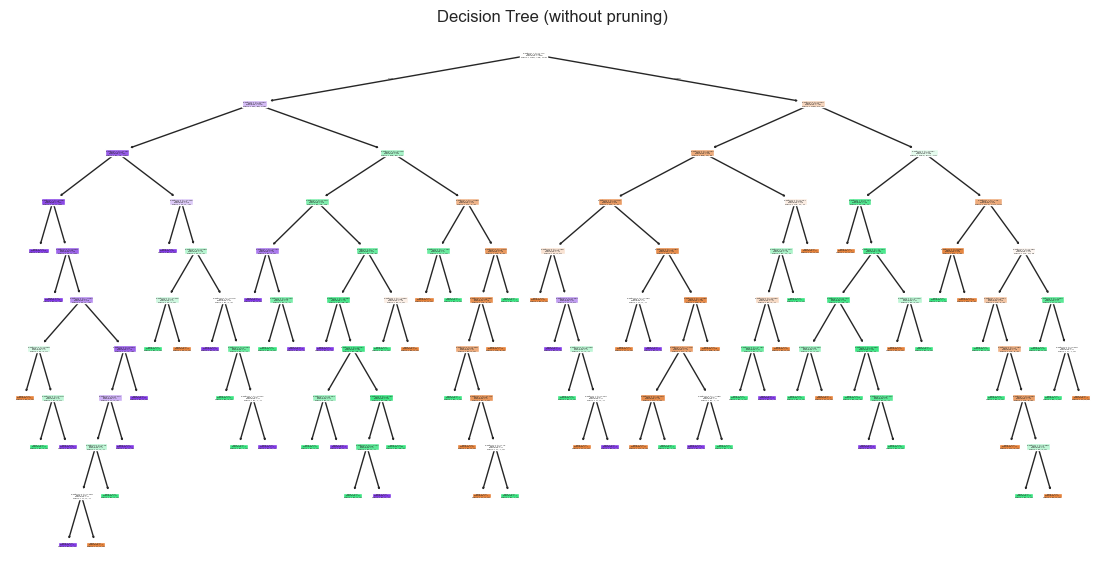

In [7]:
plt.figure(figsize=(14,7))
plot_tree(clf_default, filled=True, feature_names=[f"Feature {i}" for i in range(X.shape[1])])
plt.title("Decision Tree (without pruning)")
plt.show()

In [8]:
# Train a Decision Tree WITH pruning (max_depth)

clf_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [9]:
y_pred_pruned = clf_pruned.predict(X_test)
print("Accuracy with pruning (max_depth=3):", accuracy_score(y_test, y_pred_pruned))

Accuracy with pruning (max_depth=3): 0.76


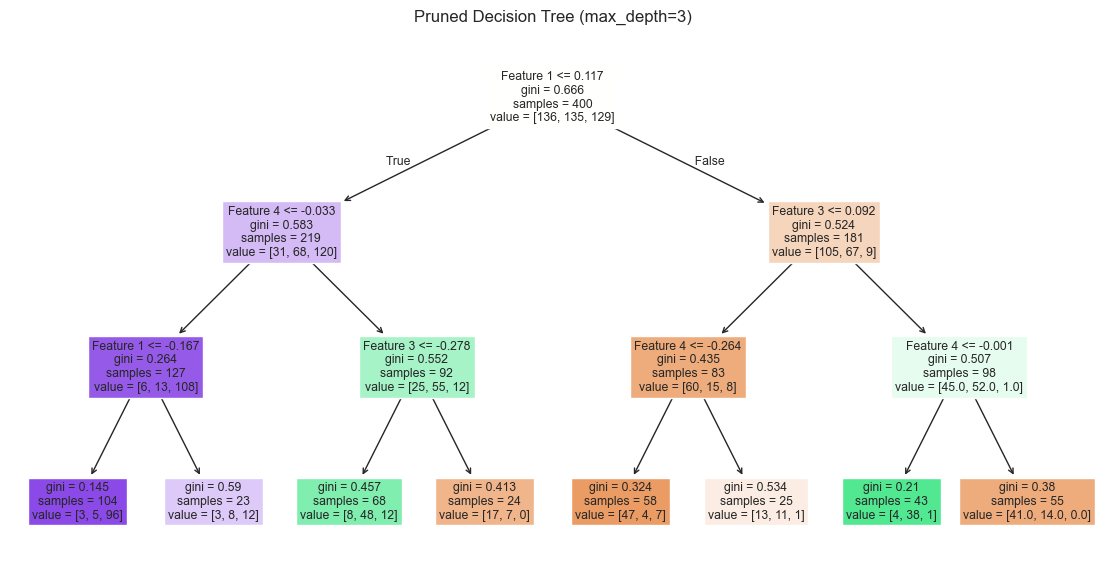

In [31]:
# Visualize the pruned Decision Tree
plt.figure(figsize=(14,7))
plot_tree(clf_pruned, filled=True, feature_names=[f"Feature {i}" for i in range(X.shape[1])])
plt.title("Pruned Decision Tree (max_depth=3)")
plt.show()

**Root Node:** This is the first question the model asks:
 “Is Feature 1 ≤ 0.12?”

samples = 400 → total number of training points seen by this node.

value = [203, 197] → 203 belong to Class 0, 197 belong to Class 1 (almost balanced).

gini = 0.5 → high impurity (mix of both classes).

Since it’s not pure, the tree splits into two branches:

Left (True) → Feature 1 ≤ 0.12

Right (False) → Feature 1 > 0.12

| Term                  | Meaning                               |  Analogy                       |
| --------------------- | ------------------------------------- | -------------------------------------- |
| **Feature X ≤ value** | The question asked at that node       | “Is temperature ≤ 30°C?”               |
| **samples**           | How many data points reach that point | How many people answered that question |
| **value = [a, b]**    | Count of data points from each class  | How many are “Yes” vs “No”             |
| **gini**              | Impurity (0 = pure, 0.5 = mixed)      | How mixed the group is                 |


The top of the tree deals with broad separation,
and lower levels fine-tune the decision.

Orange boxes (🟧) → Class 0 dominates.
Blue boxes (🟦) → Class 1 dominates.

Gini decreases as you go deeper — the model gets more confident.

Because we pruned (max_depth=3), the tree stops early and avoids memorizing every detail → better generalization.

In [ ]:
# Let's pick one random test sample
import numpy as np

sample_index = np.random.randint(0, len(X_test))
sample = X_test.iloc[sample_index] if hasattr(X_test, 'iloc') else X_test[sample_index]
# sample = X_test[sample_index]
actual_label = y_test.iloc[sample_index] if hasattr(y_test, 'iloc') else y_test[sample_index]
# actual_label = y_test[sample_index]

print(" Sample Index:", sample_index)
print(" Feature Values:\n", sample)
print(" Actual Label:", actual_label)

# Predict using our pruned model
predicted_label = clf_pruned.predict([sample])[0]
print("\n Predicted Label by Tree:", predicted_label)


 Sample Index: 38
 Feature Values:
 [-2.1518154   1.43570482 -0.71915332  1.2171173  -0.15437007]
 Actual Label: 1

 Predicted Label by Tree: 1


Let's imagine this output:

🔹 Feature Values:
Feature 0       1.85

Feature 1       0.30

Feature 2       0.50

Feature 3       0.20

Feature 4      -0.75

Name: 13, dtype: float64

🔹 Actual Label: 1

🌳 Predicted Label by Tree: 1


Step 1️⃣ – Root Node

Condition: Feature 1 ≤ 0.12

Here, Feature 1 = 0.30, which is not ≤ 0.12,

→ So we go right (False branch).

Step 2️⃣ – Right Child Node

Condition: Feature 0 ≤ 1.121

Feature 0 = 1.85, which is not ≤ 1.121,

→ Go right again.

Step 3️⃣ – Right-Right Node

Condition: Feature 0 ≤ 4.188

Feature 0 = 1.85, which is ≤ 4.188,

→ Go left this time.

Step 4️⃣ – Leaf Node Reached

Leaf Node details from tree:

gini = 0.085
samples = 90
value = [4, 86]


This means:

Out of 90 samples in this leaf, 86 belong to Class 1, only 4 to Class 0.

The model confidently predicts Class 1 (the majority).

✅ Final Prediction: Class 1

Intuitive Understanding

You can think of this like a series of yes/no questions:

“Is Feature 1 small?” → No

“Is Feature 0 small?” → No

“Is Feature 0 moderate?” → Yes

 “Then it’s probably Class 1!”

# Random Forest Classification (Titanic Dataset)

In [12]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [13]:
titanic= sns.load_dataset('titanic')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
# Preprocessing: Handle missing values and categorical data

# Select useful features
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
titanic = titanic[features + ['survived']].dropna()

In [15]:
# Convert categorical columns to numeric using one-hot encoding
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked'], drop_first=True)


In [16]:
# Split into features and target
X = titanic.drop('survived', axis=1)
y = titanic['survived']


In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Predict
y_pred = rf_clf.predict(X_test)

In [20]:
# Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest Classification Accuracy: {acc:.2f}")

Random Forest Classification Accuracy: 0.76


Explanation:

n_estimators=100 → Forest of 100 trees.

Accuracy shows how well the model predicts survival.

Random Forest handles overfitting better than a single tree.

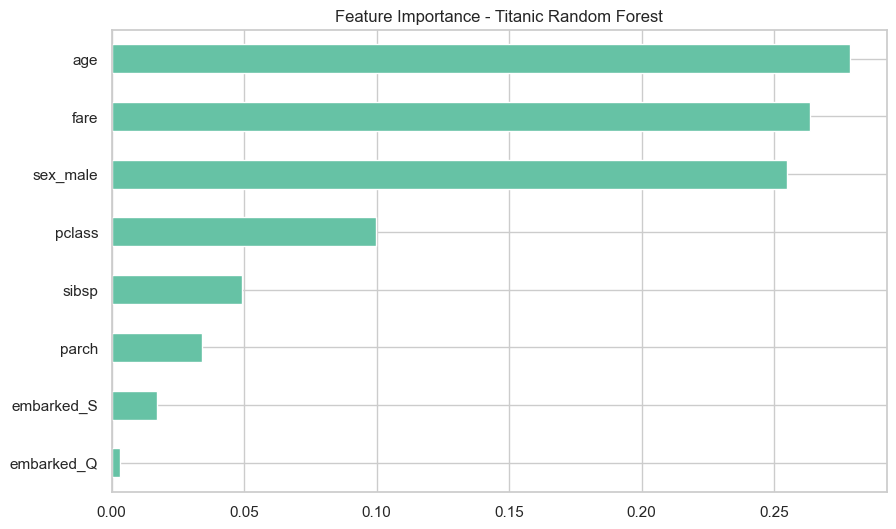

In [21]:
# Feature Importance Visualization

importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance - Titanic Random Forest")
plt.show()


Explanation:

This shows which features mattered most —
 sex_male, fare, and age dominate in predicting survival.

# Random Forest Regression (California Housing)

In [22]:
# Load California housing dataset
from sklearn.datasets import fetch_openml
import pandas as pd

housing = fetch_openml(name="california_housing", as_frame=True, parser="pandas")
df = housing.frame
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


Explanation:

The dataset has 8 numerical features (like median income, rooms, population)
and the target variable MedHouseVal — median house value in $100,000s.

In [23]:
# Split into features and target
X = df.drop(['median_house_value', 'ocean_proximity'], axis=1)
y = df['median_house_value']

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
# Predict on test data
y_pred = rf_reg.predict(X_test)

In [27]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R² Score: {r2:.3f}")


Random Forest Regression Results:
Mean Squared Error (MSE): 2484035195.257
R² Score: 0.810


Explanation:

MSE → measures average squared error (lower = better).

R² score → how much variance in target is explained (closer to 1 = better).
Usually, Random Forest gives strong performance with minimal tuning.

In [28]:
# Compare some predictions vs actual values

comparison = pd.DataFrame({
    "Actual Value": y_test.values[:10],
    "Predicted Value": y_pred[:10]
})
print(comparison)


   Actual Value  Predicted Value
0         47700         50466.00
1         45800         68904.00
2        500001        469367.53
3        218600        266104.01
4        278000        274120.00
5        158700        160472.00
6        198200        235967.00
7        157500        167317.00
8        340000        264835.03
9        446600        483684.73


Explanation:

This shows a few examples of actual vs predicted house prices.

Predictions are close, our model is performing well!

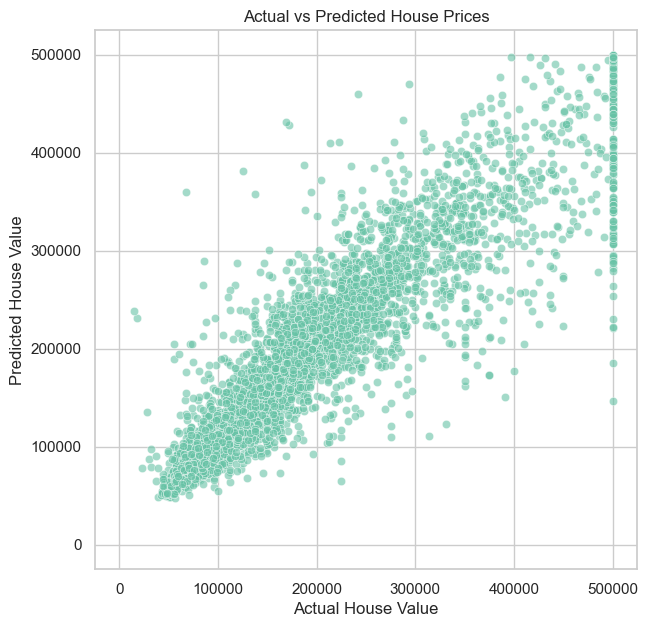

In [29]:
# Visualize Actual vs Predicted Prices

plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted House Prices")
plt.plot([0,5], [0,5], 'r--')  # ideal line
plt.show()


Explanation:

Points closer to the red dashed line mean better predictions.

The diagonal indicates perfect prediction — a good random forest will cluster near it.